In [1]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

%matplotlib inline

In [31]:
def gradientDescent(x, y, theta, alpha, m, numIterations):
    theta_list = [theta.copy()]
    errors = []
    for i in range(0, numIterations):
        hypothesis = np.dot(x, theta)
        loss = hypothesis - y
        cost = np.sum(loss ** 2) / (2 * m)
        if i % 10 == 0:
            print("Iteration %d | Cost: %f" % (i, cost))
        # avg gradient per example
        gradient = np.dot(x.transpose(), loss) / m
        # update
        theta = theta - alpha * gradient
        
        theta_list.append(theta.copy())
        errors.append(cost)
    return theta, theta_list, errors

In [15]:
def stochasticGradientDescent(x, y, theta, alpha, m, numIterations):
    theta_list = [theta.copy()]
    errors = []
    xTrans = x.transpose()
    for i in range(0, numIterations):
        train_ind = np.random.randint(x.shape[0])
        hypothesis = np.dot(x[train_ind], theta)
        loss = hypothesis - y[train_ind]
        cost = np.sum(loss ** 2) / (2 * m)
        if i % 1000 == 0:
            print("Iteration %d | Cost: %f" % (i, cost))
        # avg gradient per example
        gradient = np.dot(x[train_ind].transpose(), loss) / m
        # update
        theta = theta - alpha * gradient
        
        theta_list.append(theta.copy())
        errors.append(cost)
    return theta, theta_list, errors

In [16]:
data, target, coef = datasets.make_regression(n_samples=1000, n_features = 2, n_informative = 2, n_targets = 1, 
                                              noise = 5, coef = True, random_state = 2)

In [32]:
x_gt = data.copy()
y_gt = target.copy()
m, n = np.shape(x_gt)
numIterations= 100
alpha = 0.1
theta = np.zeros(n)
theta_gd, theta_list_gd, errors_gd = gradientDescent(x_gt, y_gt, theta, alpha, m, numIterations)
print(theta_gd)

Iteration 0 | Cost: 4095.358094
Iteration 10 | Cost: 561.282760
Iteration 20 | Cost: 86.804436
Iteration 30 | Cost: 23.095271
Iteration 40 | Cost: 14.540120
Iteration 50 | Cost: 13.391200
Iteration 60 | Cost: 13.236894
Iteration 70 | Cost: 13.216168
Iteration 80 | Cost: 13.213384
Iteration 90 | Cost: 13.213010
[62.32512127 68.27690599]


In [28]:
x_sgt = data.copy()
y_sgt = target.copy()
m, n = np.shape(x_sgt)
numIterations= 10000
alpha = 0.1
theta = np.zeros(n)
theta_sgd, theta_list_sgd, errors_sgd = stochasticGradientDescent(x_sgt, y_sgt, theta, alpha, m, numIterations)
print(theta_sgd)

Iteration 0 | Cost: 1.072795
Iteration 1000 | Cost: 1.540762
Iteration 2000 | Cost: 3.926989
Iteration 3000 | Cost: 0.055104
Iteration 4000 | Cost: 1.255814
Iteration 5000 | Cost: 0.862000
Iteration 6000 | Cost: 0.738040
Iteration 7000 | Cost: 0.061511
Iteration 8000 | Cost: 2.341196
Iteration 9000 | Cost: 0.035613
[38.52467309 42.4027066 ]


In [33]:
theta_list_gd = np.array(theta_list_gd)
errors_gd = np.array(errors_gd)
theta_list_sgd = np.array(theta_list_sgd)
errors_sgd = np.array(errors_sgd)

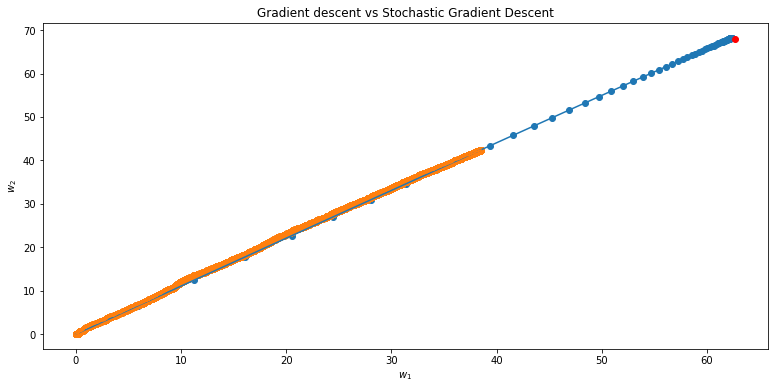

In [40]:
# Визуализируем изменение весов (красной точкой обозначены истинные веса, сгенерированные вначале)
plt.figure(figsize=(13, 6))
plt.title('Gradient descent vs Stochastic Gradient Descent')
plt.xlabel(r'$w_1$')
plt.ylabel(r'$w_2$')

plt.scatter(theta_list_gd[:, 0], theta_list_gd[:, 1])
plt.scatter(theta_list_sgd[:, 0], theta_list_sgd[:, 1])
plt.scatter(coef[0], coef[1], c='r')
plt.plot(theta_list_gd[:, 0], theta_list_gd[:, 1])
plt.plot(theta_list_sgd[:, 0], theta_list_sgd[:, 1])

plt.show()

Text(0, 0.5, 'MSE')

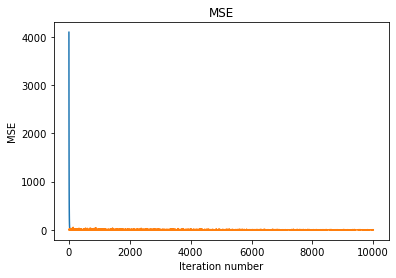

In [46]:
# Визуализируем изменение функционала ошибки
plt.plot(range(len(errors_gd)), errors_gd)
plt.plot(range(len(errors_sgd)), errors_sgd)
plt.title('MSE')
plt.xlabel('Iteration number')
plt.ylabel('MSE')